In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import pickle
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset = dataset.drop('Unnamed: 32', axis =1)
dataset = dataset.drop('id', axis =1)

In [4]:
dataset.loc[(dataset['diagnosis'] == 'M'), 'diagnosis'] = 'Malignant'
dataset.loc[(dataset['diagnosis'] == 'B'), 'diagnosis'] = 'Benign'

In [5]:
dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  Malignant        17.99         10.38          122.80     1001.0   
1  Malignant        20.57         17.77          132.90     1326.0   
2  Malignant        19.69         21.25          130.00     1203.0   
3  Malignant        11.42         20.38           77.58      386.1   
4  Malignant        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [6]:
dataset.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [7]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
dataset.shape

(569, 31)

In [9]:
dataset['diagnosis'].agg(['count', 'size', 'nunique'])

count      569
size       569
nunique      2
Name: diagnosis, dtype: int64

In [10]:
pd.value_counts(dataset['diagnosis'])

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

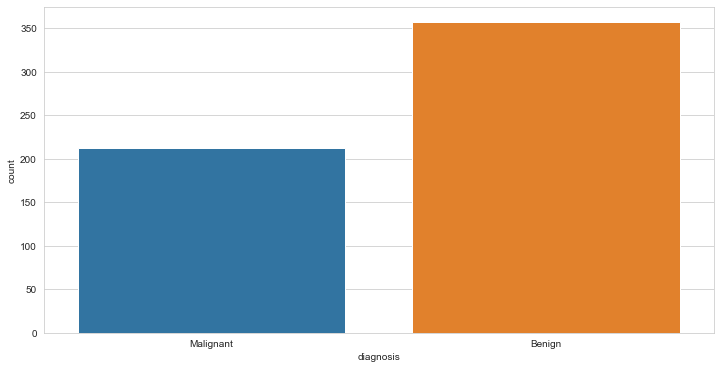

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x="diagnosis", data=dataset);

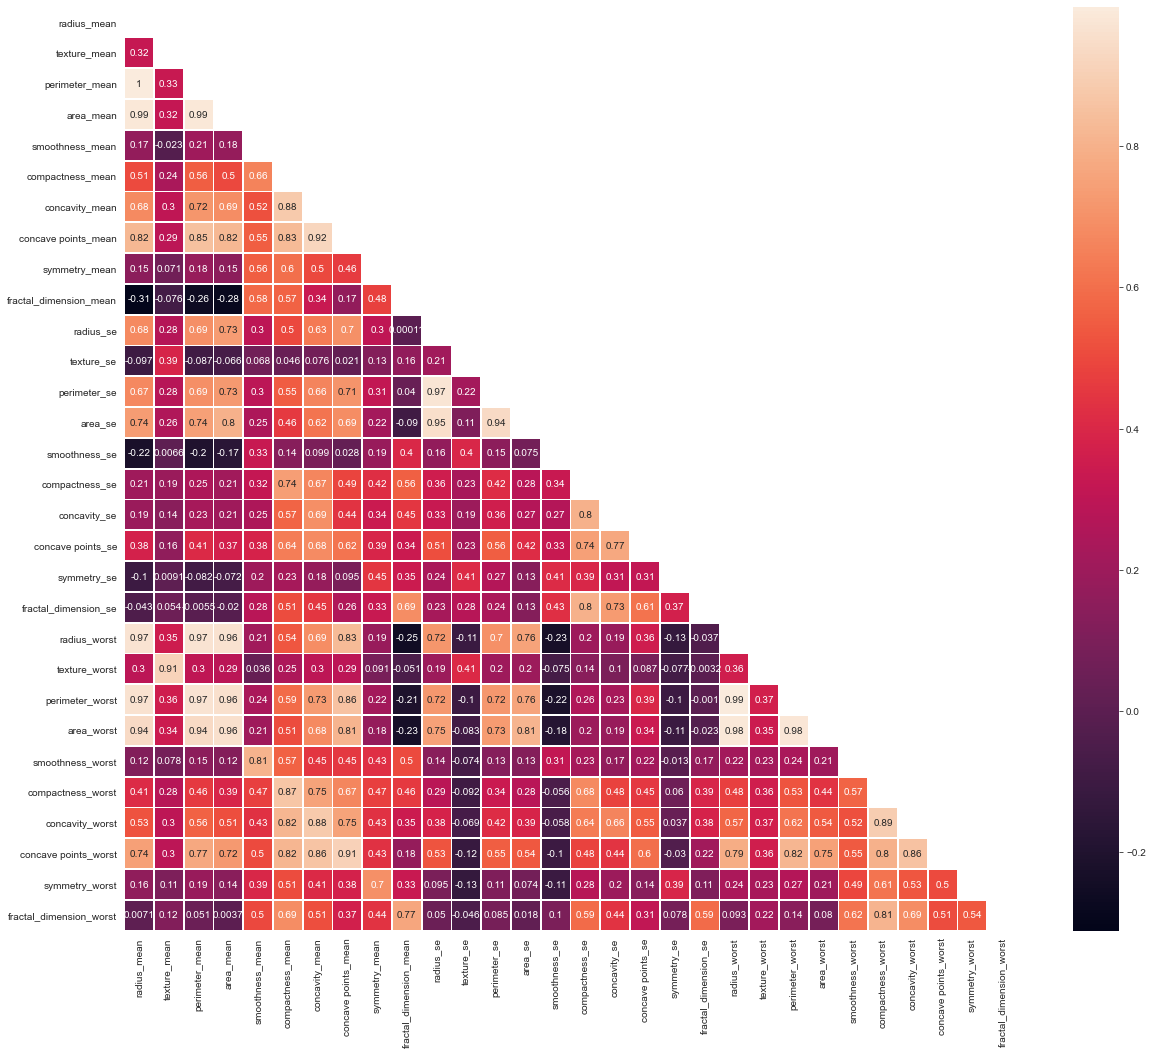

In [12]:
plt.figure(figsize=(20, 17))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True, linewidth=.8,mask=matrix, cmap="rocket");

In [13]:
# Creating a list of columns with only the columns that represent the mean values.
mean_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
             'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Creating a list of columns with only the columns that represent the standard error values.
se_columns = ['diagnosis','radius_se','texture_se','perimeter_se',
              'area_se','smoothness_se','compactness_se','concavity_se',
              'concave points_se','symmetry_se','fractal_dimension_se']

# Creating a list of columns with only the columns that represent the worst values.
worst_columns = ['diagnosis', 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']

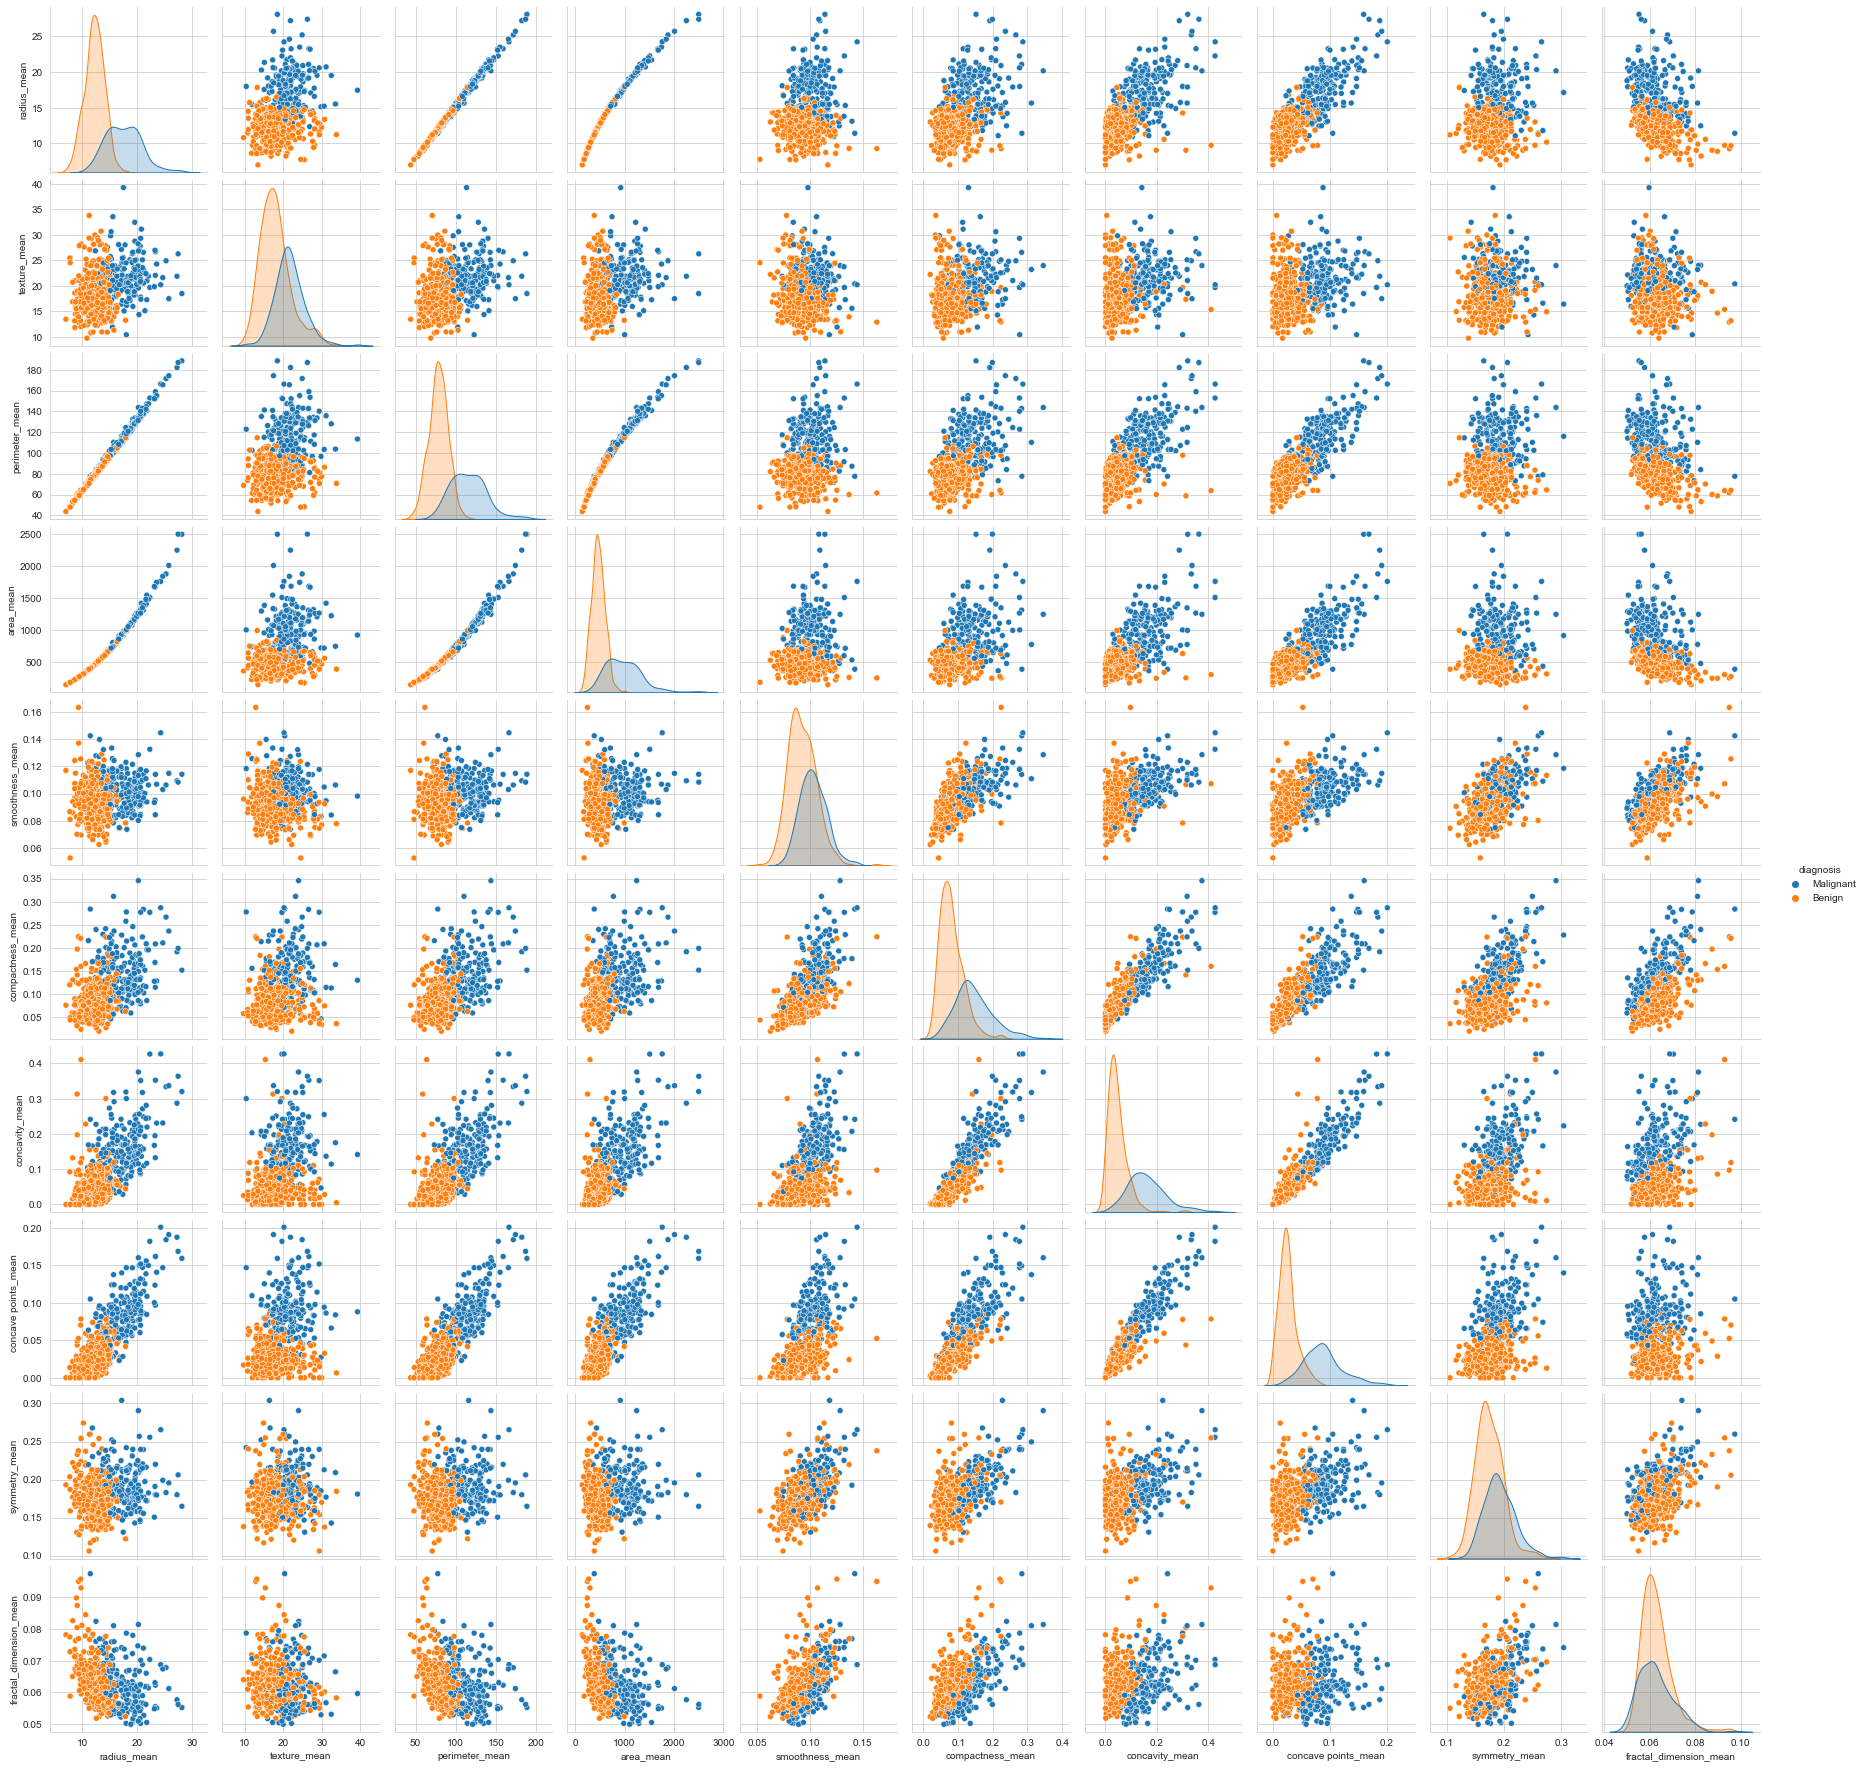

In [14]:
sns.pairplot(dataset[mean_columns], hue="diagnosis");

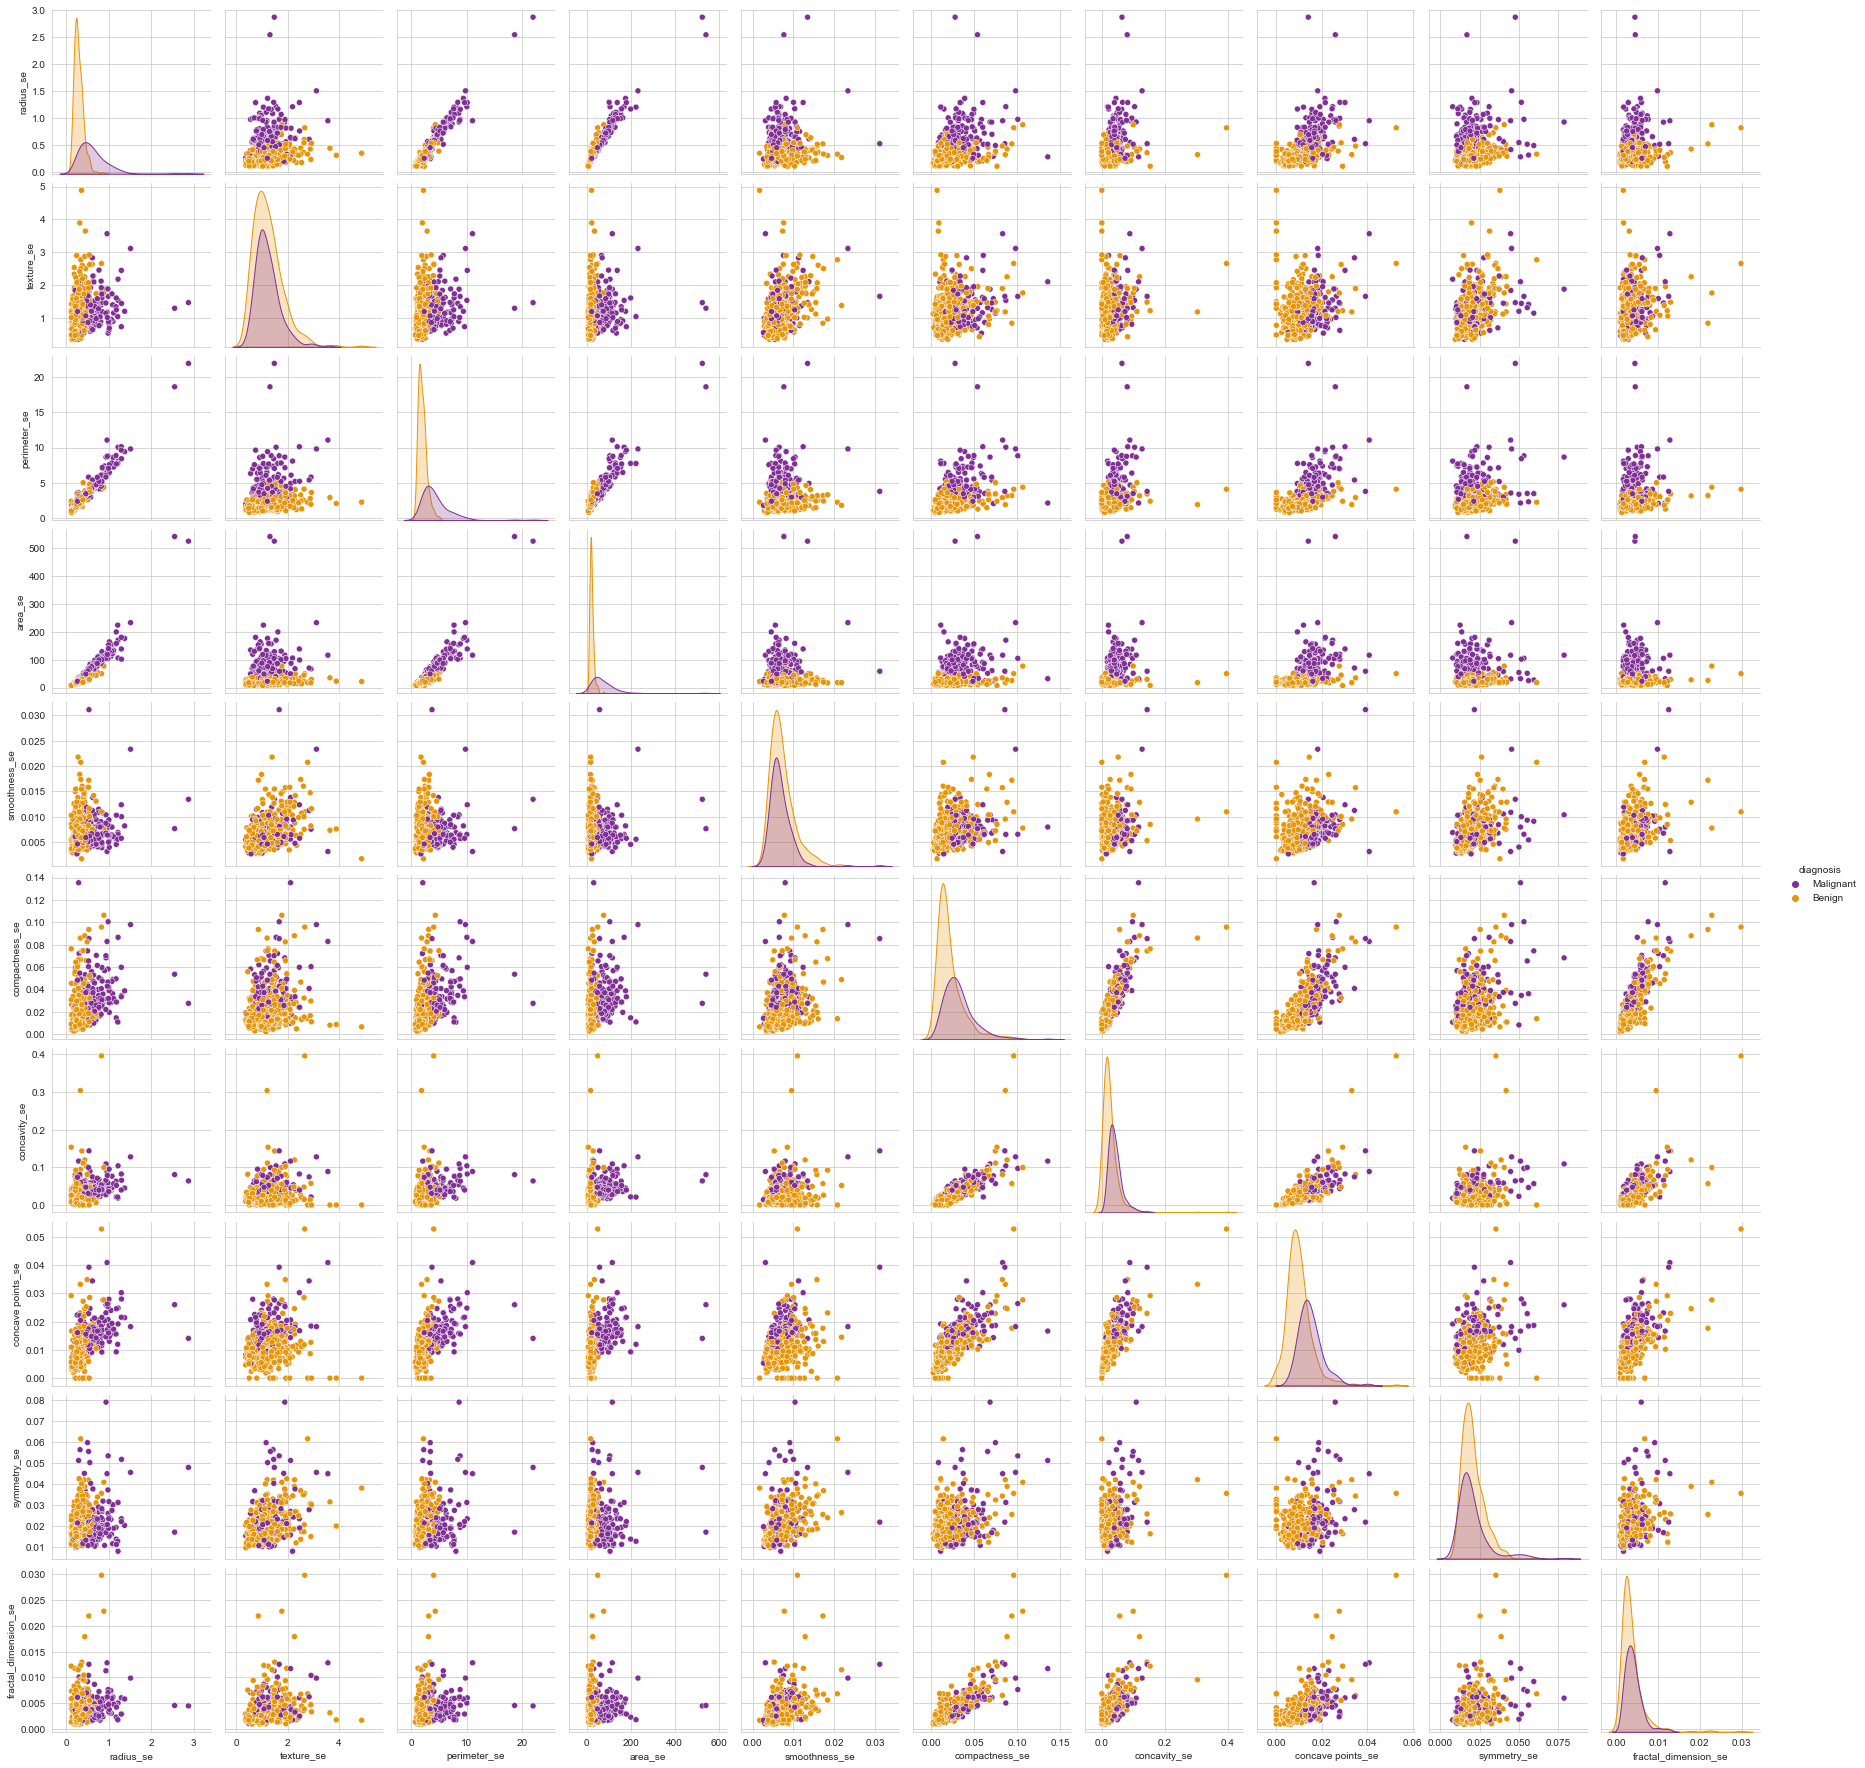

In [15]:
sns.pairplot(dataset[se_columns], hue="diagnosis", palette="CMRmap" );

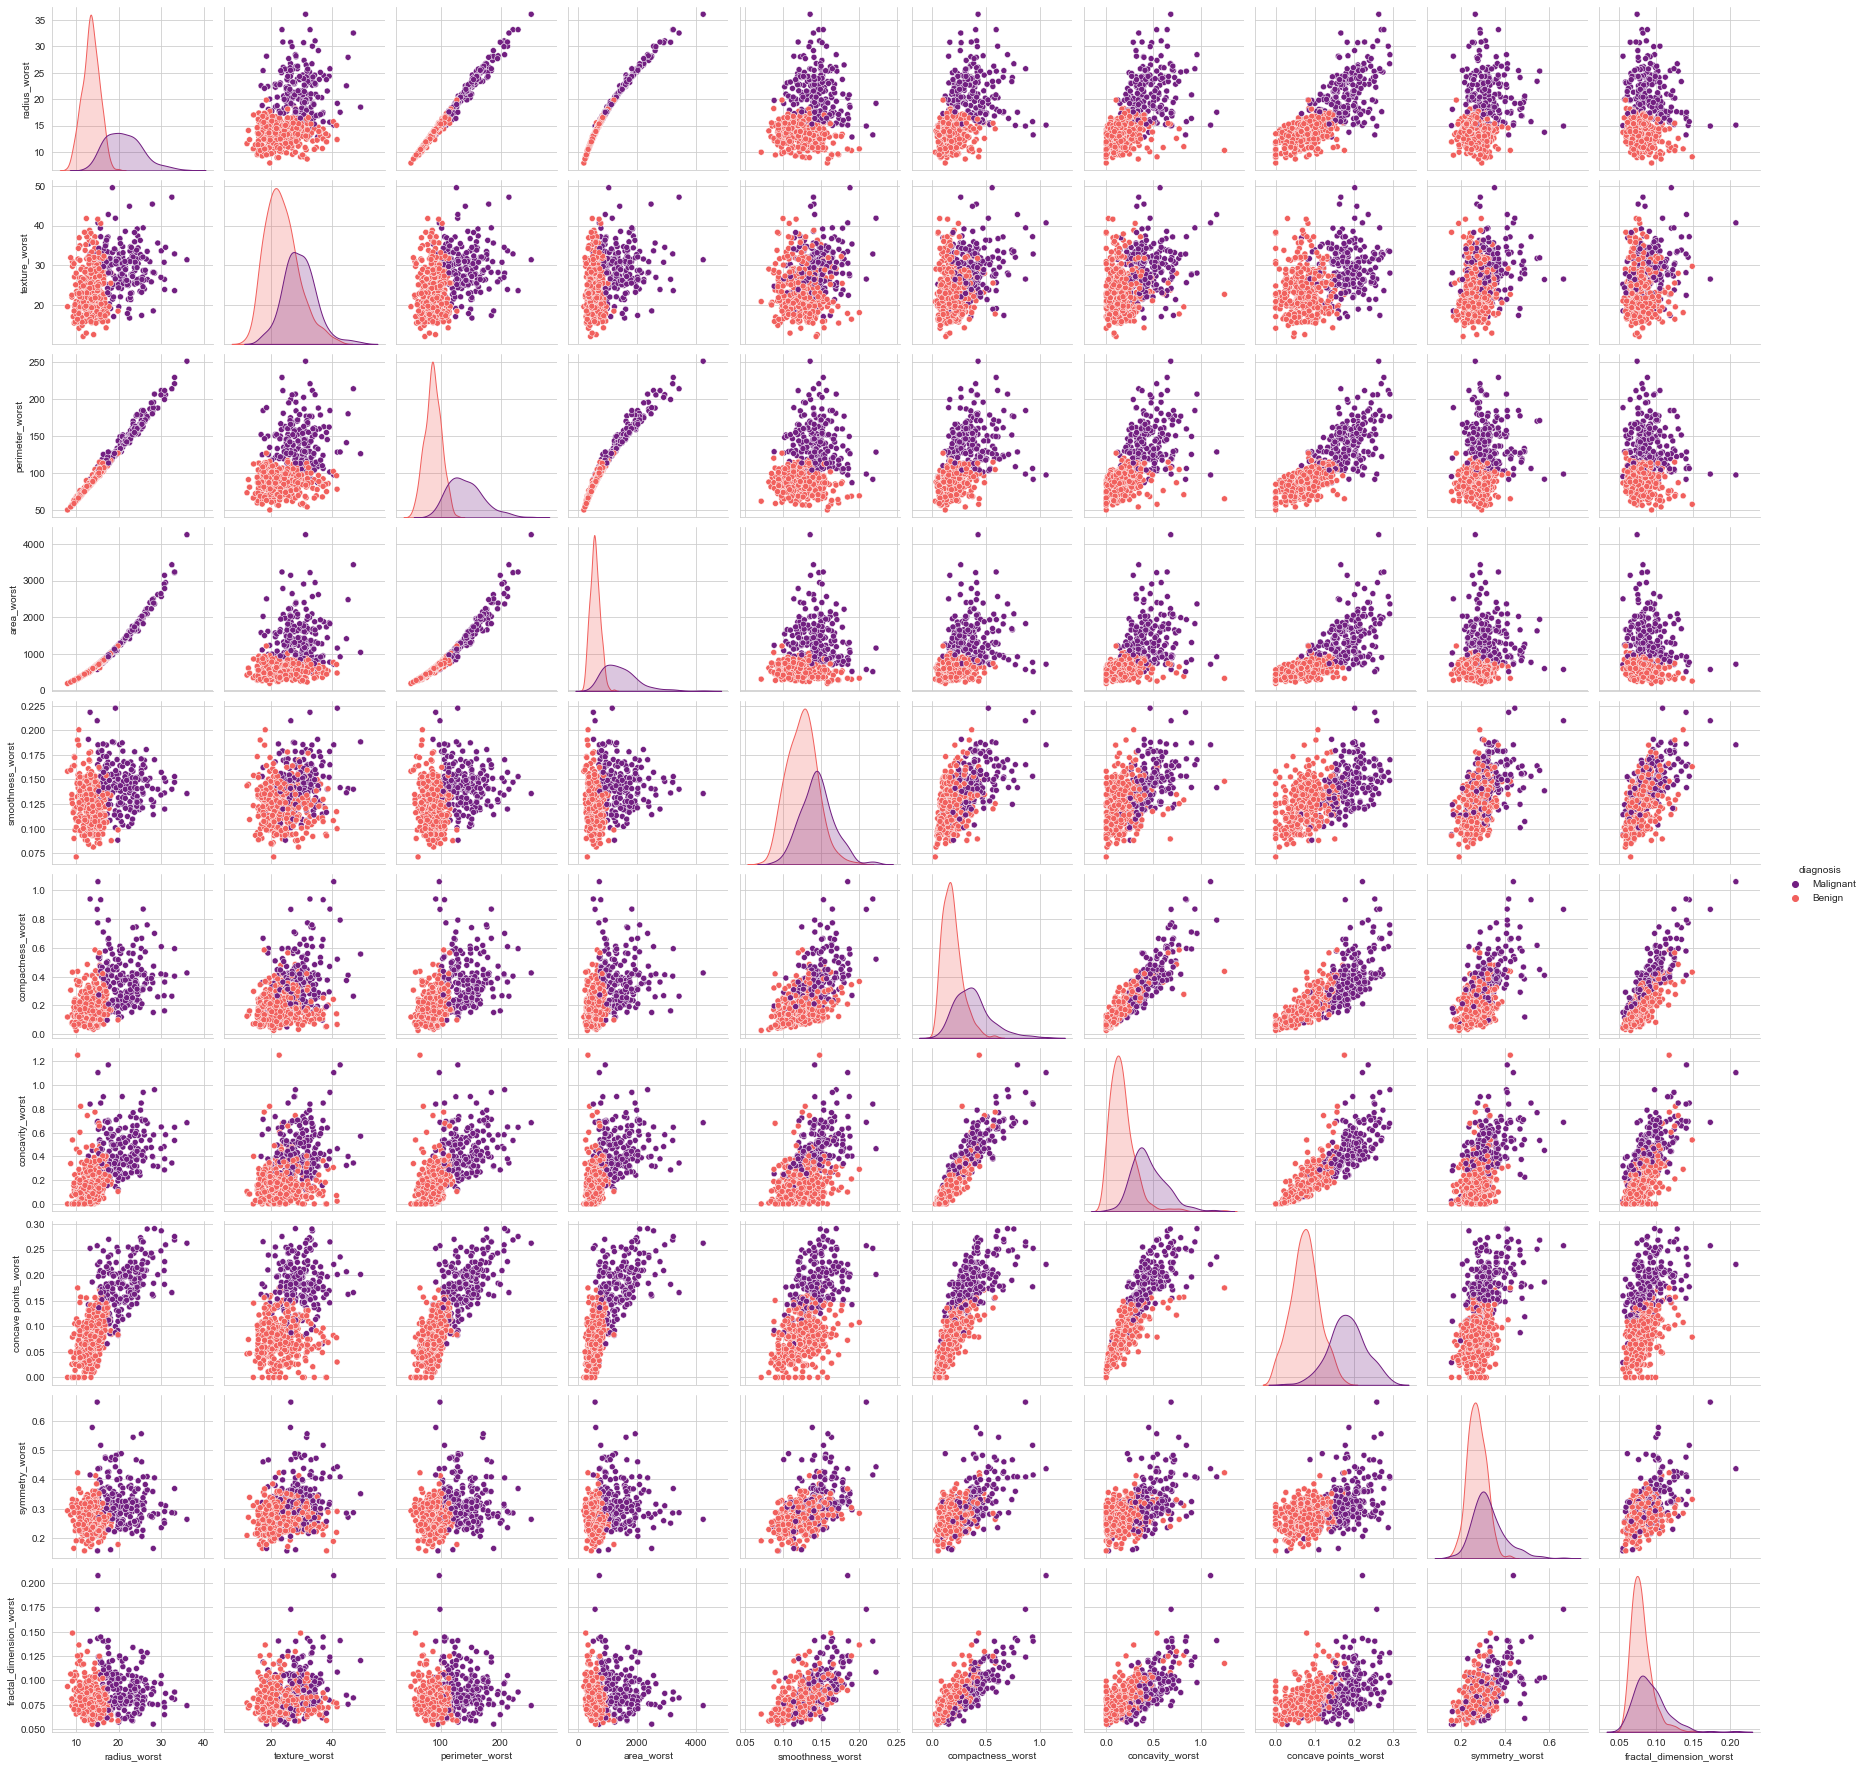

In [16]:
sns.pairplot(dataset[worst_columns], hue="diagnosis", palette='magma');

In [17]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:, 0:1].values

In [18]:
X.shape

(569, 30)

In [19]:
y.shape

(569, 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [21]:
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(y_train.shape))

X_train shape: (426, 30)
Y_train shape: (426, 1)


In [22]:
print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(y_test.shape))

X_test shape: (143, 30)
Y_test shape: (143, 1)


In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_features=30, n_estimators=200)
model.fit(X_train, y_train)
print('The Test Accuracy of the model is ', model.score(X_test, y_test))
pickle.dump(model, open('TumorLearning.pkl', 'wb'))

The Test Accuracy of the model is  0.965034965034965


In [24]:
X_test

array([[1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       [1.317e+01, 1.866e+01, 8.598e+01, ..., 2.088e-01, 3.900e-01,
        1.179e-01],
       [1.295e+01, 1.602e+01, 8.314e+01, ..., 1.056e-01, 3.380e-01,
        9.584e-02],
       ...,
       [1.505e+01, 1.907e+01, 9.726e+01, ..., 1.120e-01, 2.282e-01,
        6.954e-02],
       [1.940e+01, 2.350e+01, 1.291e+02, ..., 1.564e-01, 2.920e-01,
        7.614e-02],
       [1.189e+01, 2.117e+01, 7.639e+01, ..., 8.263e-02, 3.075e-01,
        7.351e-02]])

In [25]:
print("Test set predictions: {}".format(model.predict(X_test)))

Test set predictions: ['Benign' 'Malignant' 'Benign' 'Malignant' 'Malignant' 'Malignant'
 'Malignant' 'Malignant' 'Benign' 'Benign' 'Benign' 'Malignant'
 'Malignant' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign'
 'Malignant' 'Benign' 'Benign' 'Malignant' 'Benign' 'Malignant' 'Benign'
 'Benign' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Benign'
 'Malignant' 'Malignant' 'Benign' 'Benign' 'Malignant' 'Benign' 'Benign'
 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Malignant'
 'Benign' 'Benign' 'Benign' 'Malignant' 'Malignant' 'Malignant' 'Benign'
 'Benign' 'Benign' 'Benign' 'Benign' 'Malignant' 'Benign' 'Benign'
 'Benign' 'Malignant' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign'
 'Malignant' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Malignant'
 'Benign' 'Malignant' 'Benign' 'Benign' 'Benign' 'Malignant' 'Benign'
 'Malignant' 'Benign' 'Malignant' 'Benign' 'Benign' 'Malignant' 'Benign'
 'Malignant' 'Benign' 'Benign' 'Malignant' 'Benign' 'Benign' 'Malignant'
 'Malig

In [26]:
print("Test set accuracy: {:.2f}".format(model.score(X_test, y_test)))

Test set accuracy: 0.97


In [27]:
X_new = np.array([[15, 14, 99, 700, 0.123, 0.54,
       0.66, 0.4, 0.2, 0.08, 0.9, 1.9,
       4.0, 90, 0.88, 5.2, 5.22, 12,
       2, 5.43, 1.87, 183, 1141, 8.0,
       1.3, 3, 3.2, 11, 2.8, 0.08]])
X_new.shape

(1, 30)

In [28]:
prediction = model.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: ['Malignant']
